## Test prior extend value

In [27]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from PIL import Image
import os


In [28]:
EXTEND = 100 
SLOPE = 10

Text(0.5, 0, 'x')

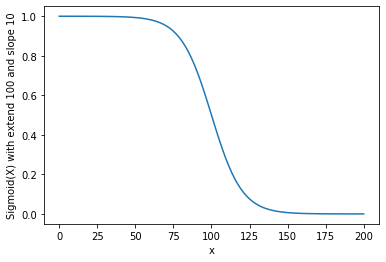

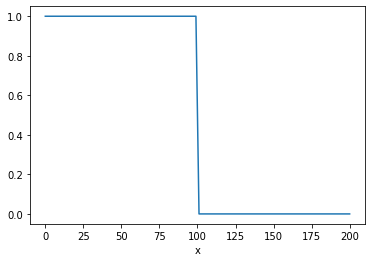

In [29]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
x = np.linspace(0, EXTEND * 2, 100)
y = sigmoid((-x + EXTEND)/ SLOPE)
y2 = (EXTEND - x) > 0 

plt.figure()
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel(f"Sigmoid(X) with extend {EXTEND} and slope {SLOPE}")

plt.figure()
plt.plot(x, y2)
plt.xlabel("x")

In [30]:
def vectorized_distance(A, p):
    H,W = A.shape
    px, py = p
    X,Y = np.ix_(np.arange(H),np.arange(W))
    return np.sqrt((X-px)**2 + (Y-py)**2)

In [31]:
ind = ([0,20,200], [2, 250, 250], [0, 15, 100], [3, 0, 250], [5, 10, 50],  [4, 10, 20])

In [32]:
mask = np.ones((6, 350, 350)) * -np.infty

In [34]:
for i in ind:
    p = i[1:]
    s = i[0]
    mask[s, :, :] = np.maximum(mask[s, :, :], vectorized_distance(mask[s, :, :], p)) 

print(mask[0,:5,:5])

#mask = ((-1) * mask + EXTEND) / SLOPE
mask = (-1) * mask + EXTEND  > 0

#mask = sigmoid(mask)

[[200.99751242 200.00249998 199.00753755 198.01262586 197.0177657 ]
 [200.90047287 199.90497743 198.90952717 197.91412279 196.91876498]
 [200.80836636 199.81241203 198.81649831 197.82062582 196.82479519]
 [200.72119968 199.72481068 198.72845795 197.73214205 196.73586353]
 [200.63897926 199.64217991 198.64541273 197.64867821 196.65197685]]


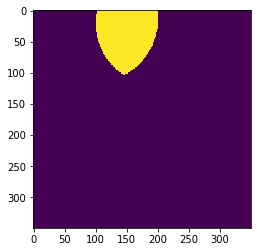

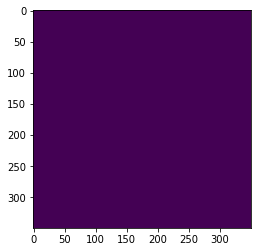

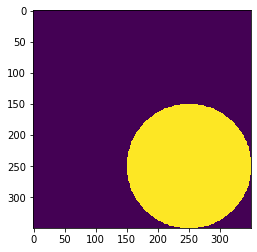

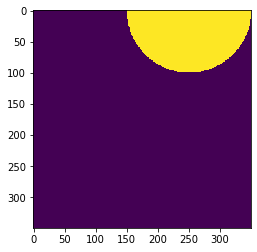

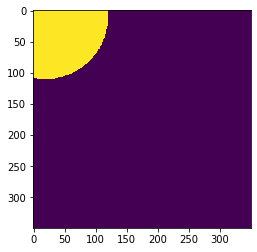

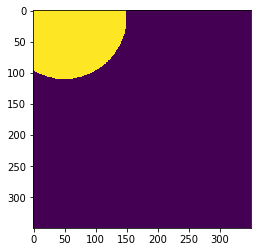

In [35]:
for i in range(mask.shape[0]):
    plt.figure()
    plt.imshow(mask[i, :, :], interpolation='nearest')

In [24]:
p = ind[0][1:]
p

[20, 200]

In [11]:
m = mask[0]
m

array([[4.10880871e-05, 4.53865212e-05, 5.01343633e-05, ...,
        3.94555889e-07, 3.57074338e-07, 3.23152939e-07],
       [4.14887282e-05, 4.58312871e-05, 5.06281229e-05, ...,
        3.96874910e-07, 3.59164601e-07, 3.25037038e-07],
       [4.18726156e-05, 4.62574761e-05, 5.11012840e-05, ...,
        3.99046747e-07, 3.61122151e-07, 3.26801470e-07],
       ...,
       [4.96437506e-13, 5.22977898e-13, 5.50832165e-13, ...,
        2.35344915e-14, 2.21690944e-14, 2.08796791e-14],
       [4.55826996e-13, 4.80140650e-13, 5.05654835e-13, ...,
        2.17191140e-14, 2.04614037e-14, 1.92735387e-14],
       [4.18509056e-13, 4.40781297e-13, 4.64150435e-13, ...,
        2.00420534e-14, 1.88836341e-14, 1.77894141e-14]])

In [12]:
dist = vectorized_distance(m, p)

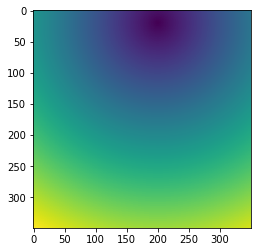

In [13]:
plt.imshow(dist, interpolation='nearest')
plt.show()

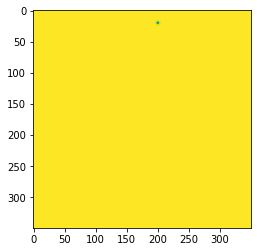

In [14]:
plt.imshow(sigmoid(dist), interpolation='nearest')
plt.show()